# PCA outline

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from IPython.core.display import Javascript

In [14]:
from IPython.core.display import Javascript
from IPython.display import display

def disable_scroll():
    display(Javascript("""
        window.addEventListener('load', function() {
            IPython.OutputArea.prototype._should_scroll = function(lines) {
                return false;
            }
        });
    """))

disable_scroll()

<IPython.core.display.Javascript object>

## Lets make some test data

* Two sets of data points, in 2d and 3d.
* Both offset centre
* With significant differences in variance/covariance

We also choose a few points to follow through the analysis

In [4]:
np.random.seed(42)

mean_2d = np.array([2, 5])
covariance_2d = np.array([[3, 2],
                          [2, 1.5]])

mean_3d = np.array([2, 5, 1])
covariance_3d = np.array([[3, 2, 1],
                          [2, 2, 1],
                          [1, 1, 1]])

samples_2d = np.random.multivariate_normal(mean_2d, covariance_2d, 100)
samples_3d = np.random.multivariate_normal(mean_3d, covariance_3d, 100)


# Choose a few points
c = np.random.choice(np.arange(100),5)
mask = np.ones(samples_2d.shape[0], dtype=bool)  # Create a mask of True values
mask[c] = False

Lets take a look at these

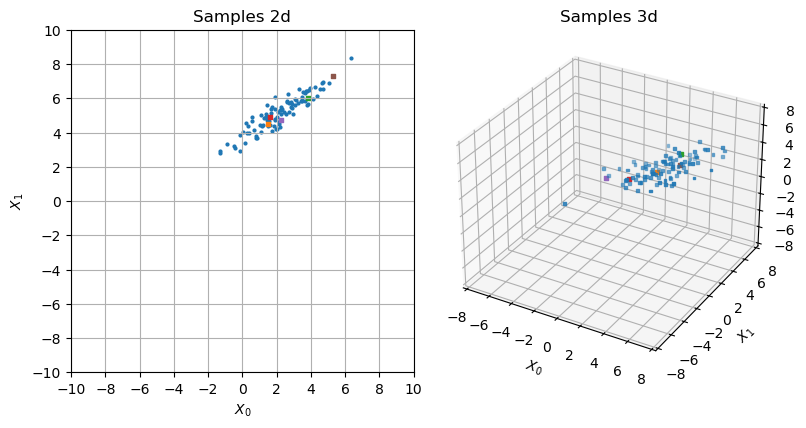

In [5]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2,projection='3d')
ax1.scatter(samples_2d[:,0],samples_2d[:,1],s=4)
for ci in c:
    ax1.scatter(samples_2d[ci, 0], samples_2d[ci, 1],s=6,marker='s')
ax1.set_aspect('equal', adjustable='box')
ax1.set_xlim([-10,10])
ax1.set_ylim([-10,10])
ax1.set_xticks(np.arange(-10,12,2))
ax1.set_yticks(np.arange(-10,12,2))
ax1.grid()
ax1.set_title("Samples 2d")
ax1.set_xlabel('$X_0$')
ax1.set_ylabel('$X_1$')

ax2.scatter(samples_3d[mask,0],samples_3d[mask,1],samples_3d[mask,2],s=4,marker='s')
for ci in c:
    ax2.scatter(samples_3d[ci, 0], samples_3d[ci, 1],samples_3d[ci, 2],s=6,marker='s',alpha=1)

minv = np.floor(np.min(samples_3d))
maxv = np.ceil( np.max(samples_3d) )
m = np.max([maxv,np.abs(minv)])

_=ax2.set_xlim([-m,m])
_=ax2.set_ylim([-m,m])
_=ax2.set_zlim([-m,m])

ax2.set_title("Samples 3d")
ax2.set_xlabel('$X_0$')
ax2.set_ylabel('$X_1$')
ax2.set_zlabel('$X_2$')

plt.tight_layout()

## Looking at the covariance matrix

Lets look at the the covariance matrices
~
* In the top row, we will plot the covariance matrices we used when generating the data
* In the bottom row, the covariance matrices estimated from the data. 

C:\Users\geojli\AppData\Local\Temp\ipykernel_20540\3030574067.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


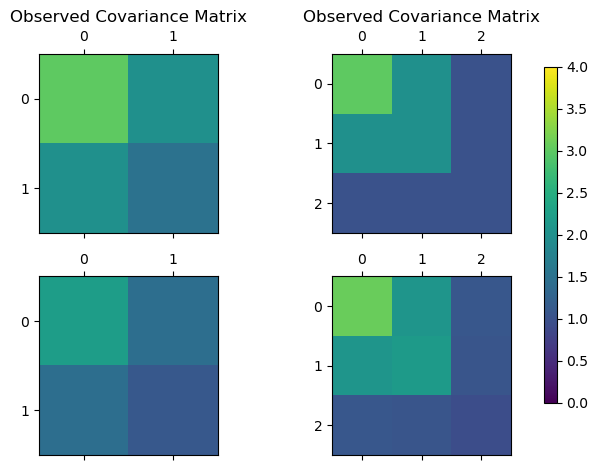

In [8]:
fig,axs = plt.subplots(2,2)

cax1 = axs[0,0].matshow(covariance_2d,vmin=0,vmax = 4)
axs[0,1].matshow(covariance_3d,vmin=0,vmax = 4)
axs[0,0].set_title("Generating Covariance Matrix")
axs[0,1].set_title("Generating Covariance Matrix")

axs[1,0].matshow(np.cov(samples_2d.T),vmin=0,vmax = 4)
axs[1,1].matshow(np.cov(samples_3d.T),vmin=0,vmax = 4)
axs[0,0].set_title("Observed Covariance Matrix")
axs[0,1].set_title("Observed Covariance Matrix")

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])

# Add the colorbar to the new axes
fig.colorbar(cax1, cax=cbar_ax)

plt.tight_layout()

# Performing the PCA

Lets perform the PCA on the 2d samples we have transforming them into the new space.

We will plot the original data along with the principal components themselves
Then we will plot the data in the transformed space. Throughout this we will follow some points to see where they lie in both spaces.

In [6]:
pca_2d = PCA(n_components=2)
transformed_2d = pca_2d.fit_transform(samples_2d)

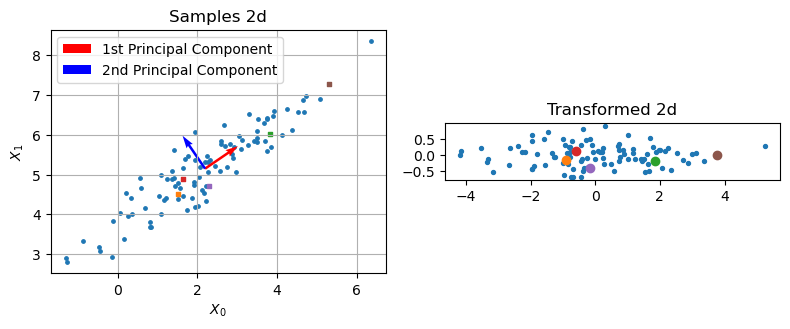

In [7]:
pc1 = pca_2d.components_[0] 
pc2 = pca_2d.components_[1]

fig,ax = plt.subplots(1,2,figsize=(8, 4))
ax[0].scatter(samples_2d[:,0],samples_2d[:,1],s=6)
for ci in c:
    ax[0].scatter(samples_2d[ci, 0], samples_2d[ci, 1],s=8,marker='s')
ax[0].quiver(*pca_2d.mean_, *pc1, color='r', scale=1, units='xy', angles='xy', scale_units='xy', label='1st Principal Component')
ax[0].quiver(*pca_2d.mean_, *pc2, color='b', scale=1, units='xy', angles='xy', scale_units='xy', label='2nd Principal Component')

ax[0].set_title("Samples 2d")
ax[0].set_xlabel('$X_0$')
ax[0].set_ylabel('$X_1$')
ax[0].set_aspect('equal')
ax[0].legend()

ax[0].grid()

ax[1].scatter(transformed_2d[:, 0], transformed_2d[:, 1],s=8, label='PCA Transformed Data')
for ci in c:
    ax[1].scatter(transformed_2d[ci, 0],transformed_2d[ci, 1], label='PCA Transformed Data')
ax[1].grid()
#maxext = np.max([ax[1].get_ylim(),ax[1].get_xlim(),np.abs( ax[1].get_xlim() ),np.abs( ax[1].get_ylim() )])
#ax[1].set_xlim([-maxext,maxext])
#ax[1].set_ylim([-maxext,maxext])
ax[1].set_aspect('equal')
ax[1].grid()
ax[1].set_title("Transformed 2d")

plt.tight_layout()

We can see that we have:
* Two principal components, the same dimensionality as the original data.
* They are orthogonal to each other and have unit length.

When we look at the transformed data.
* Now we can see a large variation along the first component, this is the direction along which most of our data is spread.
* Look at the green point. It lies along the red arrow (first component) about two arrow lengths in the original space. In the transformed space it sits at roughly (2,0).
* Look at the purple point. It lies slightly behind in the direction given by the red arrow and behind the direction of the blue arrow about half a blue arrows length. In the transformed space it is at roughly (-0.1,-0.5).

Lets look at some other numbers, no need to plot these here.
* *Explained variance*: How much of the variance of the dataset is *explained* by each component.
* *Cumulative variance*: The cumulative sum of these explained variances. The end of this array will always be one.

In [15]:
explained_variance = pca_2d.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print(f"Explained variance: {explained_variance}")
print(f"Cumulative explained variance {cumulative_variance}")

Explained variance: [0.96587983 0.03412017]
Cumulative explained variance [0.96587983 1.        ]


Lets also look at the covariance matrix of the data in the original and transformed space.

Text(0.5, 1.0, 'Transformed Space')

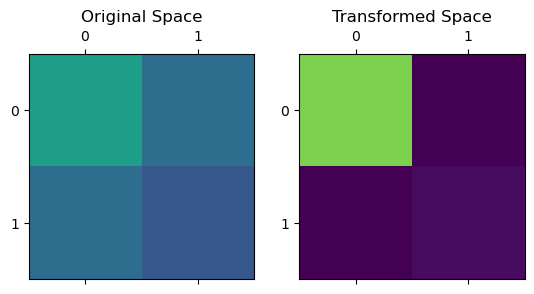

In [23]:
fig,axs = plt.subplots(1,2)
cax1 = axs[0].matshow(np.cov(samples_2d.T),vmin=0,vmax = 4)
cax2 = axs[1].matshow(np.cov(transformed_2d.T),vmin=0,vmax = 4)

axs[0].set_title("Original Space")
axs[1].set_title("Transformed Space")